In [1]:
#  import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import LeaveOneOut

#  import data and specify patient diagnose and outcome

In [2]:
data = pd.read_table('ARI.txt',sep = ',')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [3]:
data

,ID,dPLI,Hub
0,WSAS02,0.052242,2.169325
1,WSAS05,0.033583,1.284143
2,WSAS09,0.122368,1.867642
3,WSAS10,0.055298,0.936156
4,WSAS11,0.024191,1.285684
5,WSAS12,0.039730,0.680283
6,WSAS13,0.041347,0.958628
7,WSAS18,0.029963,1.039139
8,WSAS19,0.100620,1.517578
9,WSAS20,0.053043,1.771634


In [4]:
ID=data['ID']

In [5]:
dPLI=data['dPLI']

In [6]:
Hub=data['Hub']

In [7]:
Outcome=[1,0,1,0,0,0,0,0,1,1,0]
Diagnose=[0,1,0,0,0,1,0,0,0,0,0]
CRSR=[4,10,4,5,6,11,5,5,0,3,5]

In [8]:
data= np.stack((ID, dPLI, Hub, Outcome,Diagnose,CRSR),axis=1)

I need to adapt the dataformat here into float and ineger (otherwise the numbers will be represented as a category)

In [9]:
data=pd.DataFrame(data)
data.columns=['ID','dPLI','Hub','Outcome','Diagnose','CRSR']
data['dPLI']=data['dPLI'].astype(float)
data['Hub']=data['Hub'].astype(float)
data['Outcome']=data['Outcome'].astype(int)
data['Diagnose']=data['Diagnose'].astype(int)
data['CRSR']=data['CRSR'].astype(int)


This is how the data looks like

In [10]:
data

,ID,dPLI,Hub,Outcome,Diagnose,CRSR
0,WSAS02,0.052242,2.169325,1,0,4
1,WSAS05,0.033583,1.284143,0,1,10
2,WSAS09,0.122368,1.867642,1,0,4
3,WSAS10,0.055298,0.936156,0,0,5
4,WSAS11,0.024191,1.285684,0,0,6
5,WSAS12,0.039730,0.680283,0,1,11
6,WSAS13,0.041347,0.958628,0,0,5
7,WSAS18,0.029963,1.039139,0,0,5
8,WSAS19,0.100620,1.517578,1,0,0
9,WSAS20,0.053043,1.771634,1,0,3


[Text(0, 0, 'Non-recovered'), Text(0, 0, 'Recovered')]

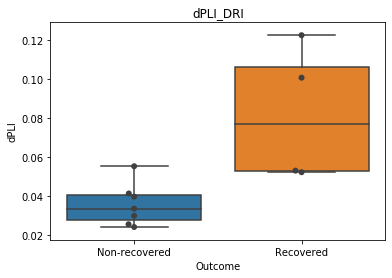

In [11]:

ax = sns.boxplot(x="Outcome", y="dPLI", data=data)
sns.swarmplot(x="Outcome", y="dPLI", data=data, color=".25", size = 6)
ax.set_title('dPLI_DRI')
ax.set_xticklabels(['Non-recovered','Recovered'])

[Text(0, 0, 'Non-recovered'), Text(0, 0, 'Recovered')]

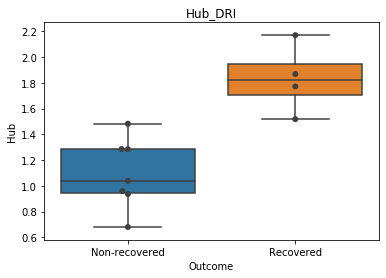

In [12]:
import seaborn as sns
ax = sns.boxplot(x="Outcome", y="Hub", data=data)
sns.swarmplot(x="Outcome", y="Hub", data=data,color=".25",size = 6)
ax.set_title('Hub_DRI')
ax.set_xticklabels(['Non-recovered','Recovered'])

Text(0.5, 1.0, 'Hub for recovered 1 and nonrecovered 0 ')

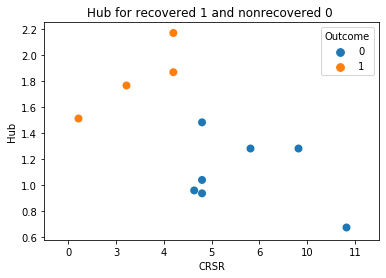

In [13]:
ax = sns.swarmplot(x="CRSR", y="Hub", data=data, hue ="Outcome",dodge=True,size=8)
ax.set_title('Hub for recovered 1 and nonrecovered 0 ')


Text(0.5, 1.0, 'dPLI and CRsr for recovered 1 and nonrecovered 0 ')

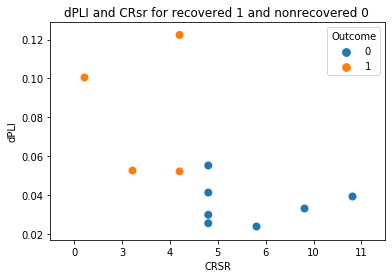

In [14]:
ax = sns.swarmplot(x="CRSR", y="dPLI", data=data, hue ="Outcome",dodge=True,size=8)
ax.set_title('dPLI and CRsr for recovered 1 and nonrecovered 0 ')


# Standardize the Data, show new data and plot

In [15]:
X = data[['dPLI','Hub']]
scaler = preprocessing.StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X))
X_stand.columns=X.columns


In [16]:
data_stand = data.copy()
data_stand['Hub']= X_stand['Hub'].copy()
data_stand['dPLI']= X_stand['dPLI'].copy()
data_stand['ARI']=data_stand['dPLI']+data_stand['Hub']
data_stand

,ID,dPLI,Hub,Outcome,Diagnose,CRSR,ARI
0,WSAS02,-0.010072,1.873058,1,0,4,1.862985
1,WSAS05,-0.632584,-0.183033,0,1,10,-0.815616
2,WSAS09,2.329409,1.172311,1,0,4,3.501720
3,WSAS10,0.091880,-0.991334,0,0,5,-0.899454
4,WSAS11,-0.945896,-0.179453,0,0,6,-1.125349
5,WSAS12,-0.427500,-1.585673,0,1,11,-2.013174
6,WSAS13,-0.373553,-0.939136,0,0,5,-1.312689
7,WSAS18,-0.753337,-0.752126,0,0,5,-1.505463
8,WSAS19,1.603876,0.359185,1,0,0,1.963062
9,WSAS20,0.016619,0.949304,1,0,3,0.965923


Text(0.5, 1.0, 'ARI and CRsr for recovered 1 and nonrecovered 0 ')

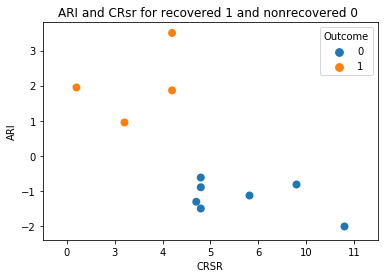

In [17]:
ax = sns.swarmplot(x="CRSR", y="ARI", data=data_stand, hue ="Outcome",dodge=True,size=8)
ax.set_title('ARI and CRsr for recovered 1 and nonrecovered 0 ')


In [18]:
# remove WSAS 19
data_stand_without19 = data_stand.query("ID != 'WSAS19'")
data_stand_without19 = data_stand_without19.reset_index()

# Perform Logistic Regression

###  Prognostic With WSAS19

In [19]:
X_stand = data_stand[['dPLI','Hub']]
Y = data_stand['Outcome']

In [20]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X_stand, Y)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
pred = clf1.predict(X_stand)
pred
clf1.score(X_stand, pred)
#clf.score(pred, data['Outcome'])

1.0

In [22]:
# implement LOSO
loo = LeaveOneOut()
loo.get_n_splits(X_stand)

11

In [23]:
LOSO_scores = []
for train_index, test_index in loo.split(X_stand):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_stand.iloc[train_index], X_stand.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #print(X_train, X_test, y_train, y_test)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    print('LOSO Accuracy:  ', acc)
    LOSO_scores.append(acc)


TRAIN: [ 1  2  3  4  5  6  7  8  9 10] TEST: [0]
LOSO Accuracy:   1.0
TRAIN: [ 0  2  3  4  5  6  7  8  9 10] TEST: [1]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  3  4  5  6  7  8  9 10] TEST: [2]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  4  5  6  7  8  9 10] TEST: [3]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  5  6  7  8  9 10] TEST: [4]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  6  7  8  9 10] TEST: [5]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  7  8  9 10] TEST: [6]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  8  9 10] TEST: [7]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  9 10] TEST: [8]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8 10] TEST: [9]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10]
LOSO Accuracy:   1.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [24]:
#Mean LOSO Score
print('Overall LOSO Accuracy:  ', np.mean(LOSO_scores))


Overall LOSO Accuracy:   1.0


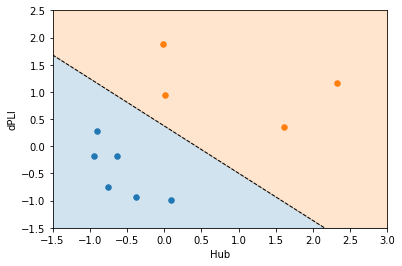

In [25]:
# Plot Model 

# Retrieve the model parameters.
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3
ymin, ymax = -1.5, 2.5

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_stand['dPLI'][Y==0],X_stand['Hub'][Y==0], s = 30)
plt.scatter(X_stand['dPLI'][Y==1],X_stand['Hub'][Y==1], s = 30)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('dPLI')
plt.xlabel('Hub')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


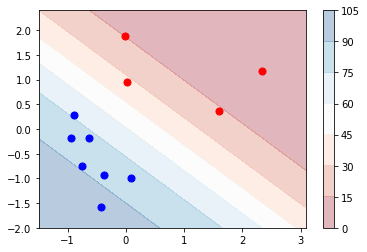

In [26]:
# Plot Model differently 

fig = plt.figure()
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3.2
ymin, ymax = -2, 2.5

# define the x and y scale
x1grid = np.arange(xmin, xmax, 0.1)
x2grid = np.arange(ymin, ymax, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_stand, Y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)*100
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu',alpha= 0.3)
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class

# create scatter of these samples
plt.scatter(X_stand['dPLI'][Y == 0], X_stand['Hub'][Y == 0], color = 'Blue',s = 50)
plt.scatter(X_stand['dPLI'][Y == 1], X_stand['Hub'][Y == 1], color = 'Red',s = 50)

# show the plot
plt.show()

###  Prognostic without WSAS19

In [27]:
X_stand = data_stand_without19[['dPLI','Hub']]
Y = data_stand_without19['Outcome']

In [28]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X_stand, Y)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
pred = clf1.predict(X_stand)
pred
clf1.score(X_stand, pred)
#clf.score(pred, data['Outcome'])

1.0

In [30]:
# implement LOSO
loo = LeaveOneOut()
loo.get_n_splits(X_stand)

10

In [31]:
LOSO_scores = []
for train_index, test_index in loo.split(X_stand):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_stand.iloc[train_index], X_stand.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #print(X_train, X_test, y_train, y_test)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    print('LOSO Accuracy:  ', acc)
    LOSO_scores.append(acc)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
LOSO Accuracy:   1.0
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
LOSO Accuracy:   1.0
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
LOSO Accuracy:   1.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
#Mean LOSO Score
print('Overall LOSO Accuracy:  ', np.mean(LOSO_scores))


Overall LOSO Accuracy:   1.0


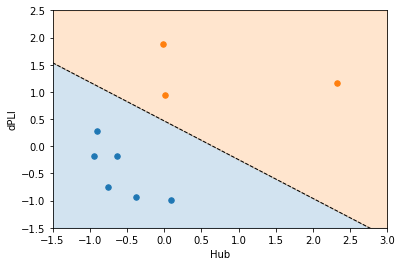

In [33]:
# Plot Model 

# Retrieve the model parameters.
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3
ymin, ymax = -1.5, 2.5

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_stand['dPLI'][Y==0],X_stand['Hub'][Y==0], s = 30)
plt.scatter(X_stand['dPLI'][Y==1],X_stand['Hub'][Y==1], s = 30)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('dPLI')
plt.xlabel('Hub')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


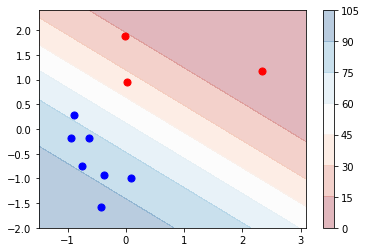

In [34]:
# Plot Model differently 

fig = plt.figure()
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3.2
ymin, ymax = -2, 2.5

# define the x and y scale
x1grid = np.arange(xmin, xmax, 0.1)
x2grid = np.arange(ymin, ymax, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_stand, Y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)*100
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu',alpha= 0.3)
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class

# create scatter of these samples
plt.scatter(X_stand['dPLI'][Y == 0], X_stand['Hub'][Y == 0], color = 'Blue',s = 50)
plt.scatter(X_stand['dPLI'][Y == 1], X_stand['Hub'][Y == 1], color = 'Red',s = 50)

# show the plot
plt.show()

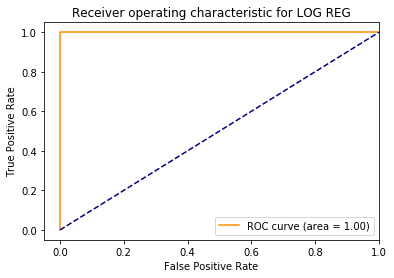

In [35]:
# GET ROC AUC
y_score = clf1.predict_proba(X_stand)[:,1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = metrics.roc_curve(Y, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LOG REG')
plt.legend(loc="lower right")


###  Diagnostic With WSAS19

In [36]:
X_stand = data_stand[['dPLI','Hub']]
Y = data_stand['Diagnose']

In [37]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X_stand, Y)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
pred = clf1.predict(X_stand)
pred
clf1.score(X_stand, pred)
#clf.score(pred, data['Outcome'])

1.0

In [39]:
# implement LOSO
loo = LeaveOneOut()
loo.get_n_splits(X_stand)

11

In [40]:
LOSO_scores = []
for train_index, test_index in loo.split(X_stand):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_stand.iloc[train_index], X_stand.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #print(X_train, X_test, y_train, y_test)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    print('LOSO Accuracy:  ', acc)
    LOSO_scores.append(acc)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10] TEST: [0]
LOSO Accuracy:   1.0
TRAIN: [ 0  2  3  4  5  6  7  8  9 10] TEST: [1]
LOSO Accuracy:   0.0
TRAIN: [ 0  1  3  4  5  6  7  8  9 10] TEST: [2]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  4  5  6  7  8  9 10] TEST: [3]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  5  6  7  8  9 10] TEST: [4]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  6  7  8  9 10] TEST: [5]
LOSO Accuracy:   0.0
TRAIN: [ 0  1  2  3  4  5  7  8  9 10] TEST: [6]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  8  9 10] TEST: [7]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  9 10] TEST: [8]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8 10] TEST: [9]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10]
LOSO Accuracy:   1.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [41]:
#Mean LOSO Score
print('Overall LOSO Accuracy:  ', np.mean(LOSO_scores))


Overall LOSO Accuracy:   0.8181818181818182


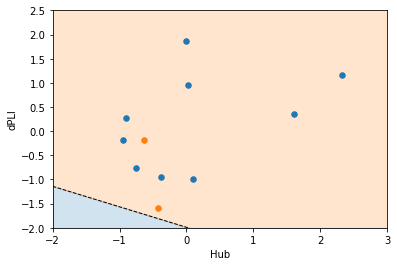

In [42]:
# Plot Model 

# Retrieve the model parameters.
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -2, 3
ymin, ymax = -2, 2.5

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_stand['dPLI'][Y==0],X_stand['Hub'][Y==0], s = 30)
plt.scatter(X_stand['dPLI'][Y==1],X_stand['Hub'][Y==1], s = 30)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('dPLI')
plt.xlabel('Hub')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


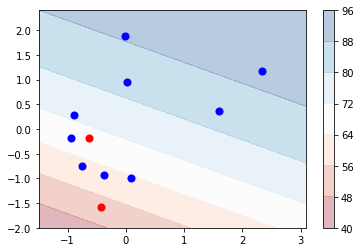

In [43]:
# Plot Model differently 

fig = plt.figure()
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3.2
ymin, ymax = -2, 2.5

# define the x and y scale
x1grid = np.arange(xmin, xmax, 0.1)
x2grid = np.arange(ymin, ymax, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_stand, Y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)*100
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu',alpha= 0.3)
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class

# create scatter of these samples
plt.scatter(X_stand['dPLI'][Y == 0], X_stand['Hub'][Y == 0], color = 'Blue',s = 50)
plt.scatter(X_stand['dPLI'][Y == 1], X_stand['Hub'][Y == 1], color = 'Red',s = 50)

# show the plot
plt.show()

###  Diagnostic Without WSAS19

In [44]:
X_stand = data_stand_without19[['dPLI','Hub']]
Y = data_stand_without19['Diagnose']

In [45]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X_stand, Y)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
pred = clf1.predict(X_stand)
pred
clf1.score(X_stand, pred)
#clf.score(pred, data['Outcome'])

1.0

In [47]:
# implement LOSO
loo = LeaveOneOut()
loo.get_n_splits(X_stand)

10

In [48]:
LOSO_scores = []
for train_index, test_index in loo.split(X_stand):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_stand.iloc[train_index], X_stand.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #print(X_train, X_test, y_train, y_test)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = clf.score(X_test, y_test)
    print('LOSO Accuracy:  ', acc)
    LOSO_scores.append(acc)


TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
LOSO Accuracy:   1.0
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
LOSO Accuracy:   0.0
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
LOSO Accuracy:   0.0
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
LOSO Accuracy:   1.0
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
LOSO Accuracy:   1.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [49]:
#Mean LOSO Score
print('Overall LOSO Accuracy:  ', np.mean(LOSO_scores))


Overall LOSO Accuracy:   0.8


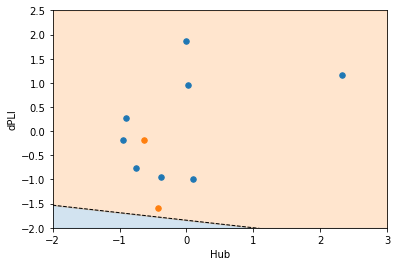

In [50]:
# Plot Model 

# Retrieve the model parameters.
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -2, 3
ymin, ymax = -2, 2.5

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_stand['dPLI'][Y==0],X_stand['Hub'][Y==0], s = 30)
plt.scatter(X_stand['dPLI'][Y==1],X_stand['Hub'][Y==1], s = 30)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('dPLI')
plt.xlabel('Hub')

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


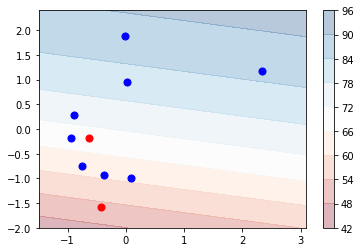

In [51]:
# Plot Model differently 

fig = plt.figure()
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3.2
ymin, ymax = -2, 2.5

# define the x and y scale
x1grid = np.arange(xmin, xmax, 0.1)
x2grid = np.arange(ymin, ymax, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_stand, Y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)*100
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu',alpha= 0.3)
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class

# create scatter of these samples
plt.scatter(X_stand['dPLI'][Y == 0], X_stand['Hub'][Y == 0], color = 'Blue',s = 50)
plt.scatter(X_stand['dPLI'][Y == 1], X_stand['Hub'][Y == 1], color = 'Red',s = 50)

# show the plot
plt.show()

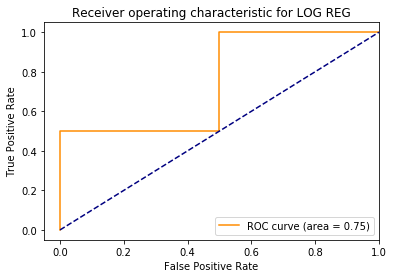

In [52]:
# GET ROC AUC
y_score = clf1.predict_proba(X_stand)[:,1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = metrics.roc_curve(Y, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LOG REG')
plt.legend(loc="lower right")
